# <h1> **Assignment** 01<h1>

# <h2>Importing the required libraries<h2>

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# <h2> Load the required dataset(diabetes.csv)<h2>

In [73]:
data = pd.read_csv('/content/diabetes.csv')

# <h2>Studying the dataset<h2>

In [74]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [75]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [76]:
data.shape

(768, 9)

In [77]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Treating zeros as nan and imputing them using suitable methods.

In [78]:
data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']] = data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']].replace(0, np.nan)

In [79]:
data.isna().sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

# Dealing with the missing values

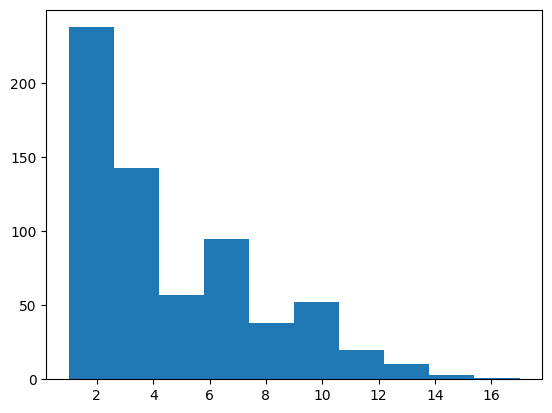

In [80]:
plt.hist(data['Pregnancies'])
plt.show()

In [81]:
data['Pregnancies'] = data['Pregnancies'].fillna(data['Pregnancies'].median())

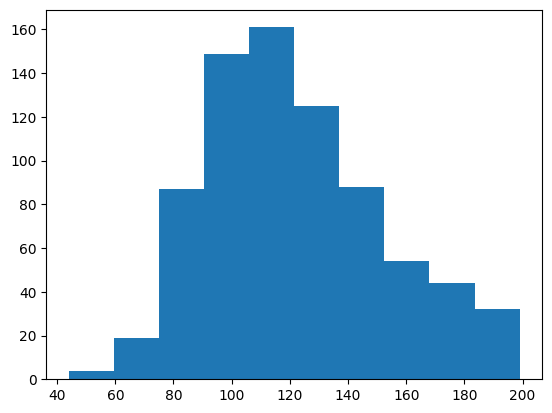

In [82]:
plt.hist(data['Glucose'])
plt.show()

In [83]:
np.where (data["Glucose"].isna())

(array([ 75, 182, 342, 349, 502]),)

In [84]:
data.drop([75, 182, 342, 349, 502],inplace = True)

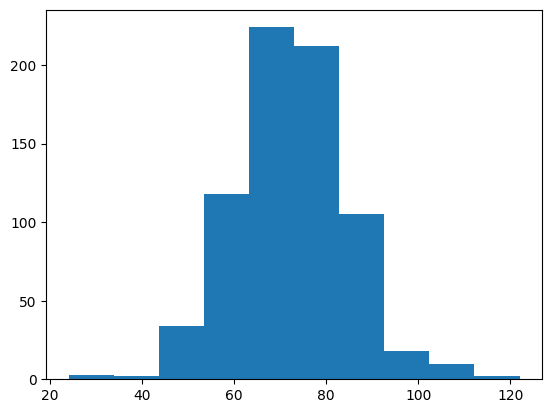

In [85]:
plt.hist(data['BloodPressure'])
plt.show()

In [86]:
data['BloodPressure'] = data['BloodPressure'].fillna(data['BloodPressure'].median())

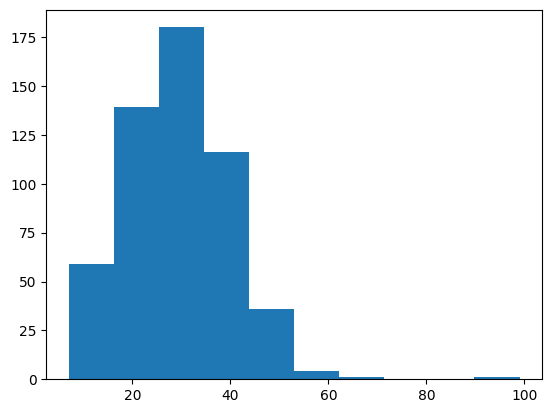

In [87]:
plt.hist(data['SkinThickness'])
plt.show()

In [88]:
data['SkinThickness'] = data['SkinThickness'].fillna(data['SkinThickness'].median())

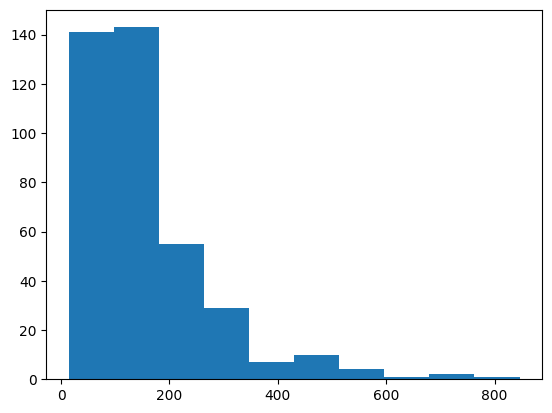

In [89]:
plt.hist(data['Insulin'])
plt.show()

In [90]:
data['Insulin'] = data['Insulin'].fillna(data['Insulin'].median())

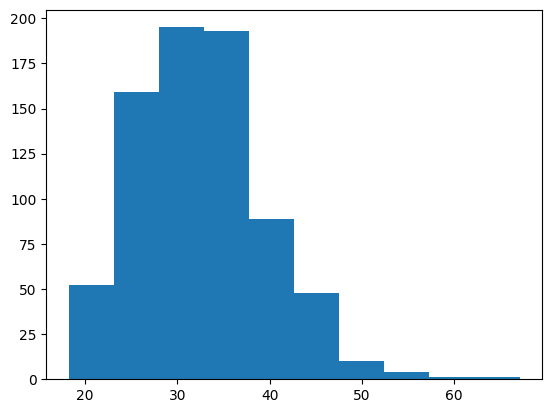

In [91]:
plt.hist(data['BMI'])
plt.show()

In [92]:
data['BMI'] = data['BMI'].fillna(data['BMI'].median())

In [93]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [94]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

# Seperating feature target

In [95]:
y = data['Outcome']
x = data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']]

# Importing scikit library for modeling and scaling

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [97]:
mn=MinMaxScaler()

In [142]:
x.loc[:,['Glucose','BloodPressure','Insulin']] = mn.fit_transform(x[['Glucose','BloodPressure','Insulin']])

<ipython-input-142-0ed9fb5aa179>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.loc[:,['Glucose','BloodPressure','Insulin']] = mn.fit_transform(x[['Glucose','BloodPressure','Insulin']])


In [99]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,0.670968,0.489796,35.0,0.133413,33.6,0.627,50
1,1.0,0.264516,0.428571,29.0,0.133413,26.6,0.351,31
2,8.0,0.896774,0.408163,29.0,0.133413,23.3,0.672,32
3,1.0,0.290323,0.428571,23.0,0.096154,28.1,0.167,21
4,4.0,0.600000,0.163265,35.0,0.185096,43.1,2.288,33


In [100]:
x.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000
mean,4.433814,0.501205,0.494062,29.104849,0.152534,32.452425,0.472477,33.271298
std,2.981880,0.197004,0.123456,8.793908,0.104030,6.878757,0.331963,11.772161
min,1.000000,0.000000,0.000000,7.000000,0.000000,18.200000,0.078000,21.000000
25%,2.000000,0.354839,0.408163,25.000000,0.128606,27.500000,0.243500,24.000000
50%,4.000000,0.470968,0.489796,29.000000,0.133413,32.300000,0.374000,29.000000
75%,6.000000,0.625806,0.571429,32.000000,0.137620,36.550000,0.626500,41.000000
max,17.000000,1.000000,1.000000,99.000000,1.000000,67.100000,2.420000,81.000000


# Splitting Train and Test set

In [101]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

# Logistic Regression Model

In [102]:
from sklearn.linear_model import LogisticRegression

# <h3>Creating an instance for Logistic Regression<h3>

In [103]:
lg_reg = LogisticRegression()

In [104]:
lg_reg.fit(x_train, y_train)

LogisticRegression()

In [105]:
y_pred1 = lg_reg.predict(x_test)

#Importing scikit library for confusion_matrix, accuracy_score and precision_score

In [106]:
from sklearn.metrics import confusion_matrix , accuracy_score, precision_score, f1_score

# Finding the accuracy of the model

In [107]:
accuracy_score(y_test ,y_pred1)

0.7973856209150327

#Finding the confusion_matrix

In [108]:
confusion_matrix(y_test, y_pred1)

array([[93, 12],
       [19, 29]])

#Finding the precision_score

In [109]:
precision_score(y_test,y_pred1)

0.7073170731707317

#<h1>**kNN**<h1>

#Importing kNN library from scikit

In [110]:
from sklearn.neighbors import KNeighborsClassifier

# To store accuracy values initializing a empty list 'metric_k'   and providing the range of k

In [111]:
metric_k =[]
neighbors = np.arange(5,20)

# Creating the model by iterating the value of k

In [112]:
for k in neighbors:
  classifier = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski', p = 2)#p=1 manhattan , p=2 euclidian
  classifier.fit(x_train,y_train)
  y_pred_knn = classifier.predict(x_test)
  acc = accuracy_score(y_test, y_pred_knn)
  metric_k.append(acc)

# Visualizing the model

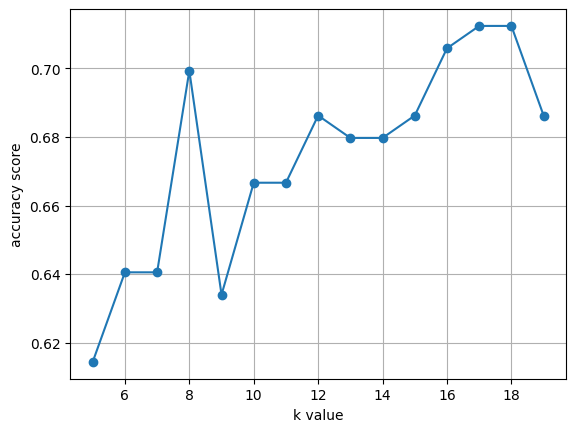

In [113]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy score')
plt.grid()
plt.show()

In [114]:
classifier = KNeighborsClassifier(n_neighbors = 18, metric = 'minkowski', p = 2)#p=1 manhattan , p=2 euclidian
classifier.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=18)

In [115]:
y_pred_knn = classifier.predict(x_test)

#Finfing the confusion_matrix

In [116]:
confusion_matrix(y_test, y_pred_knn)

array([[92, 13],
       [31, 17]])

#Finfing the accuracy_score

In [117]:
accuracy_score(y_test, y_pred_knn)

0.7124183006535948

#Finfing the precision_score

In [118]:
precision_score(y_test,y_pred_knn)

0.5666666666666667

#<h1>**SVM Classification**<h1>

#<h2>Importing the scikit libraries for SVM classification<h2>

In [119]:
from sklearn.svm import SVC

#<h2>Selecting 'linear' kernal for the instance<h2>

In [120]:
sv = SVC(kernel = 'linear')

In [121]:
sv.fit(x_train,y_train)

SVC(kernel='linear')

In [122]:
y_pred = sv.predict(x_test)

#Finding the accuracy score

In [123]:
print(accuracy_score(y_test,y_pred))

0.7908496732026143


#Finding the precision score

In [124]:
print(precision_score(y_test,y_pred))

0.6904761904761905


In [125]:
y_pred

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [126]:
confusion_matrix(y_test,y_pred)

array([[92, 13],
       [19, 29]])

#Trying 'Polinomial' kernal

In [127]:
sv1 = SVC(kernel ='poly',degree =3)
sv1.fit(x_train,y_train)
y_pred1 = sv1.predict(x_test)

In [128]:
print(accuracy_score(y_test, y_pred1))

0.6862745098039216


In [129]:
print(precision_score(y_test,y_pred1))

0.5


In [130]:
confusion_matrix(y_test,y_pred1)

array([[92, 13],
       [35, 13]])

#Trying 'rbf' kernal

In [131]:
sv2 = SVC(kernel ='rbf')
sv2.fit(x_train,y_train)
y_pred2 = sv2.predict(x_test)

In [132]:
print(accuracy_score(y_test, y_pred2))

0.673202614379085


In [133]:
print(precision_score(y_test,y_pred2))

0.4642857142857143


In [134]:
confusion_matrix(y_test,y_pred2)

array([[90, 15],
       [35, 13]])

#<h1>**Naive Bayes Classification**<h1>

#<h1>Importing the required libraries<h1>

In [135]:
from sklearn.naive_bayes import GaussianNB

#<h2>Creating an intance<h2>

In [136]:
gnb = GaussianNB()

In [137]:
gnb.fit(x_train,y_train)

GaussianNB()

In [138]:
y_pred = gnb.predict(x_test)

#<h2>Finding the accuracy score<h2>

In [139]:
print(accuracy_score(y_test, y_pred))

0.7647058823529411


#<h2>Finding confusion matrix<h2>

In [140]:
confusion_matrix(y_test,y_pred)

array([[87, 18],
       [18, 30]])

#<h2>Finding precision score<h2>

In [141]:
print(precision_score(y_test,y_pred))

0.625
